In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import matplotlib
matplotlib.rcParams['font.family'] = 'FreeSans'
import os 

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/yuxiangw/Yuxiang/CCA_CALPHAD_SSS_ML


In [2]:
import pandas as pd

# Read the CSV file into a DataFrame and specify the column names
df = pd.read_csv('SputteringCompoMapNormalised.dat',
                 delimiter='\t', names=['x', 'y', 'A', 'B', 'C', 'D', 'E'])

df1 = df[['A', 'B', 'C', 'D', 'E']]*100

display(df1.head(), df1.shape)


,A,B,C,D,E
0,47.0,12.0,5.0,3.0,33.0
1,40.0,11.0,5.0,5.0,39.0
2,34.0,10.0,4.0,7.0,44.0
3,27.0,9.0,4.0,11.0,49.0
4,22.0,7.0,3.0,14.0,53.0


(69, 5)

In [3]:
# generate the full permutation of ['A', 'B', 'C', 'D', 'E']
permulist = list(permutations(['A', 'B', 'C', 'D', 'E']))  # this is tuple

# new dataframe
df_full = pd.DataFrame()

for i in range(len(permulist)):
    # for i in range(2):

    if i == 0:
        continue    # continue here
    # print(i)

    # pick the current permutation of ABCDE
    permulist_temp = list(permulist[i])
    # display(permulist_temp)

    # shuffle the columns
    df_temp = df1[permulist_temp]
    # display(df_temp.columns.tolist())

    df_temp.columns = ['A', 'B', 'C', 'D', 'E']
    # display(df_temp.columns.tolist())

    # append the temp df to the master df
    df_full = pd.concat([df_full, df_temp], ignore_index=True)
    df_full.drop_duplicates()

    # print(df_full.shape)

display(df_full.head(), df_full.shape)


,A,B,C,D,E
0,47.0,12.0,5.0,33.0,3.0
1,40.0,11.0,5.0,39.0,5.0
2,34.0,10.0,4.0,44.0,7.0
3,27.0,9.0,4.0,49.0,11.0
4,22.0,7.0,3.0,53.0,14.0


(8211, 5)

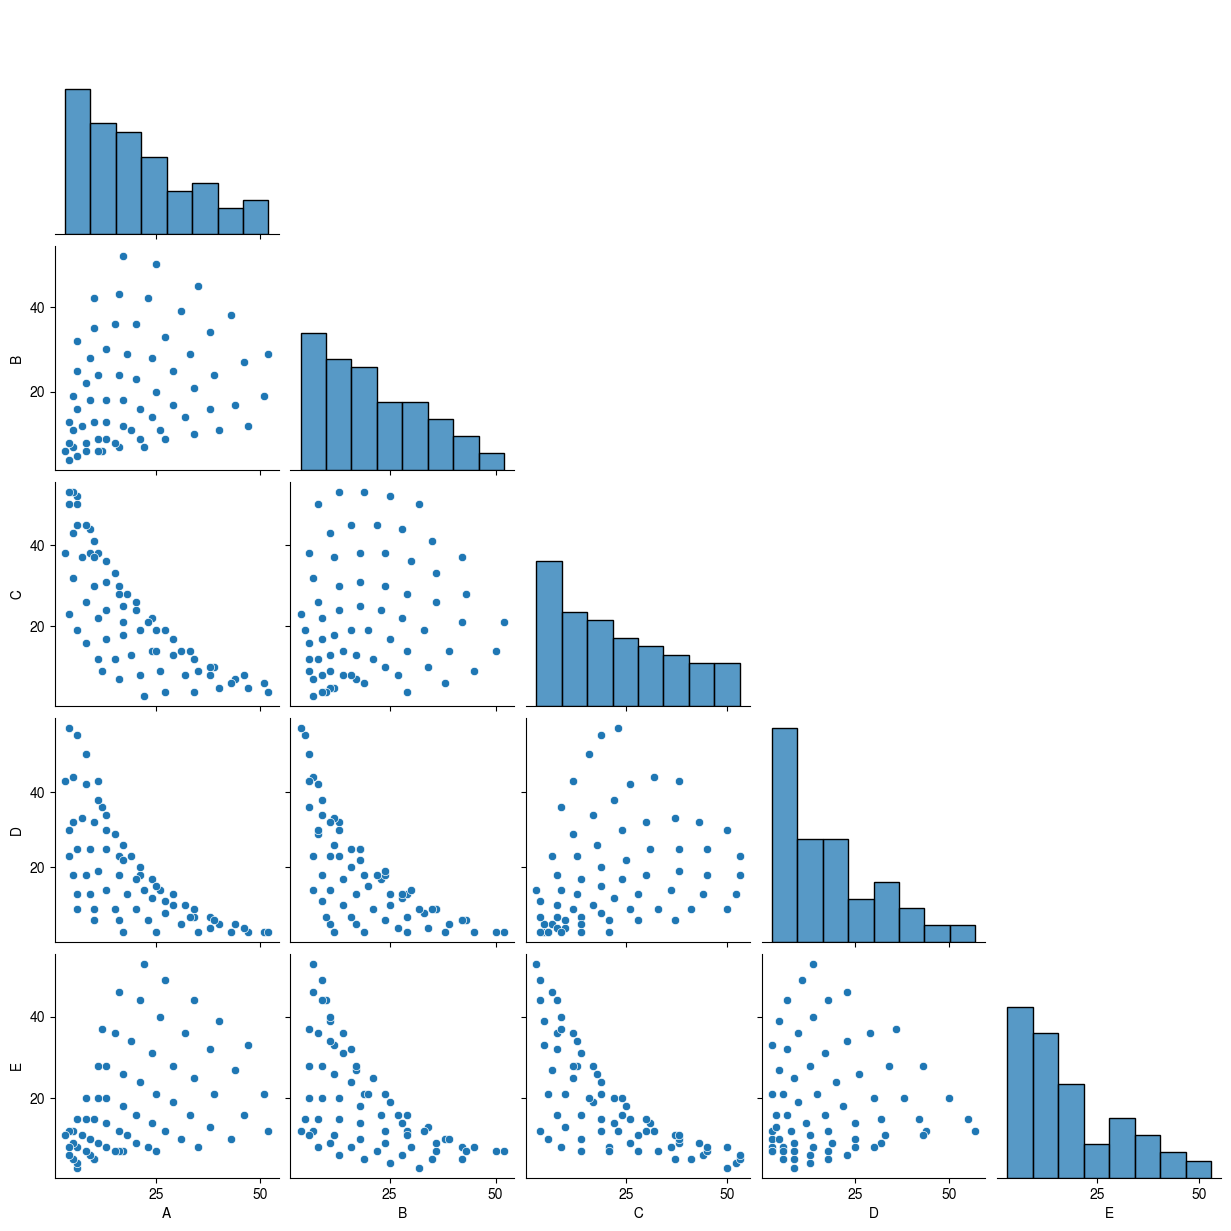

In [4]:
# Create the pairplot base on df1
sns_fig = sns.pairplot(df1, kind="scatter", corner=True)

sns.set_context("notebook", font_scale=2)

# Show the plot
# plt.savefig('pairplot.png')
plt.show()


In [5]:
# import seaborn as sns
# iris = sns.load_dataset("iris")
# print(iris)

df1 = df1.assign(dataset='no permutation')
display(df1.head(3))

df_full = df_full.assign(dataset='permutation')
display(df_full.head(3))

df_conc = pd.concat([df_full, df1], ignore_index=True)

df_conc.rename(columns={
    'A': 'element A\n(at.%)',
    'B': 'element B\n(at.%)',
    'C': 'element C\n(at.%)',
    'D': 'element D\n(at.%)',
    'E': 'element E\n(at.%)'
}, inplace=True)

display(df_conc.head(3), df_conc.head(-3))


,A,B,C,D,E,dataset
0,47.0,12.0,5.0,3.0,33.0,no permutation
1,40.0,11.0,5.0,5.0,39.0,no permutation
2,34.0,10.0,4.0,7.0,44.0,no permutation


,A,B,C,D,E,dataset
0,47.0,12.0,5.0,33.0,3.0,permutation
1,40.0,11.0,5.0,39.0,5.0,permutation
2,34.0,10.0,4.0,44.0,7.0,permutation


,element A\n(at.%),element B\n(at.%),element C\n(at.%),element D\n(at.%),element E\n(at.%),dataset
0,47.0,12.0,5.0,33.0,3.0,permutation
1,40.0,11.0,5.0,39.0,5.0,permutation
2,34.0,10.0,4.0,44.0,7.0,permutation


,element A\n(at.%),element B\n(at.%),element C\n(at.%),element D\n(at.%),element E\n(at.%),dataset
0,47.0,12.0,5.0,33.0,3.0,permutation
1,40.0,11.0,5.0,39.0,5.0,permutation
2,34.0,10.0,4.0,44.0,7.0,permutation
3,27.0,9.0,4.0,49.0,11.0,permutation
4,22.0,7.0,3.0,53.0,14.0,permutation
...,...,...,...,...,...,...
8272,6.0,16.0,45.0,25.0,8.0,no permutation
8273,5.0,11.0,43.0,32.0,9.0,no permutation
8274,3.0,6.0,38.0,43.0,11.0,no permutation
8275,6.0,32.0,50.0,9.0,3.0,no permutation


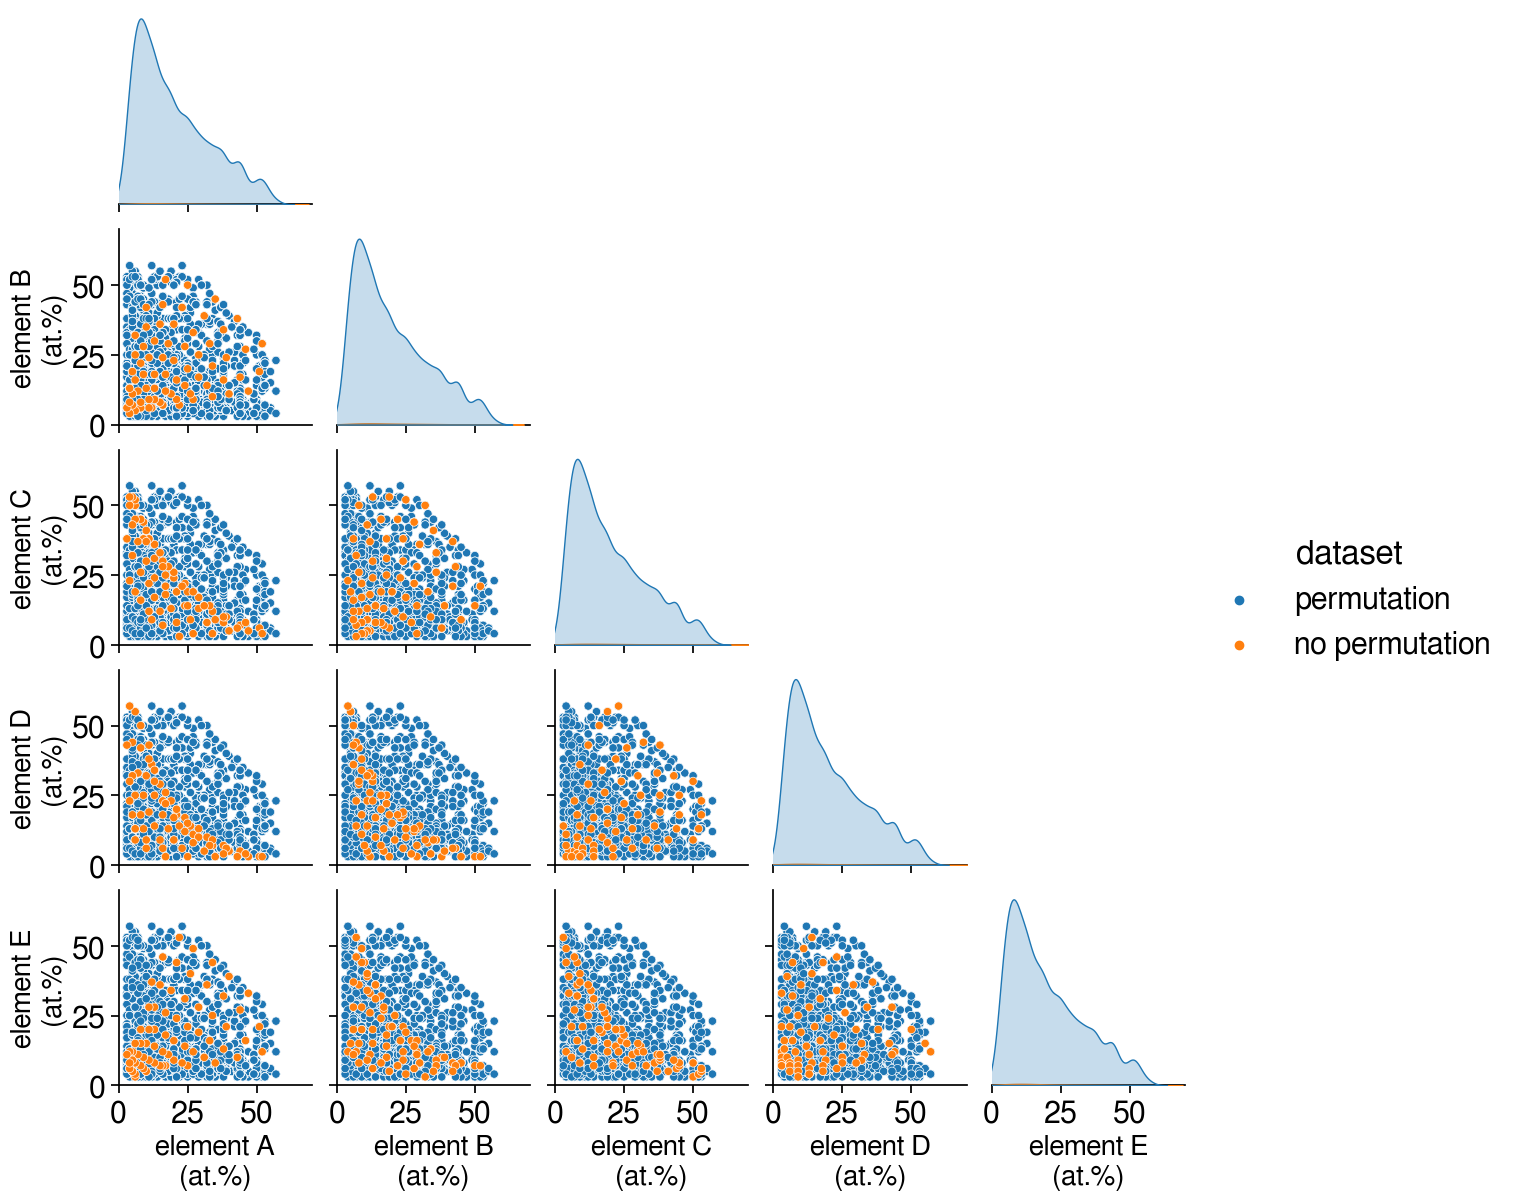

In [6]:
# Generate a pairplot with histograms on the diagonal, normalized to PDF
# g = sns.pairplot(df_conc, hue="dataset", kind="scatter", corner=True)
g = sns.pairplot(df_conc,
                 hue="dataset",
                 kind="scatter",
                 corner=True,
                 #  markers=["s", "o"],
                 )

sns.diverging_palette(220, 20, as_cmap=True)

# Custom tickers for x and y axes
xticks = np.arange(0, 51, 25)
yticks = np.arange(0, 51, 25)

# Iterate through the axes to set the limits and labels
for ax in g.axes.flat:
    if ax is not None:  # Check for None before making changes
        ax.set_xlim(0, 70)
        ax.set_ylim(0, 70)

        # Set tickers
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)

        # Adjust font size of labels
        ax.xaxis.label.set_size(20)
        ax.yaxis.label.set_size(20)

plt.savefig('sns_PVD_pairplot.pdf')
plt.show()


### comparing different orders: mirror and rotation

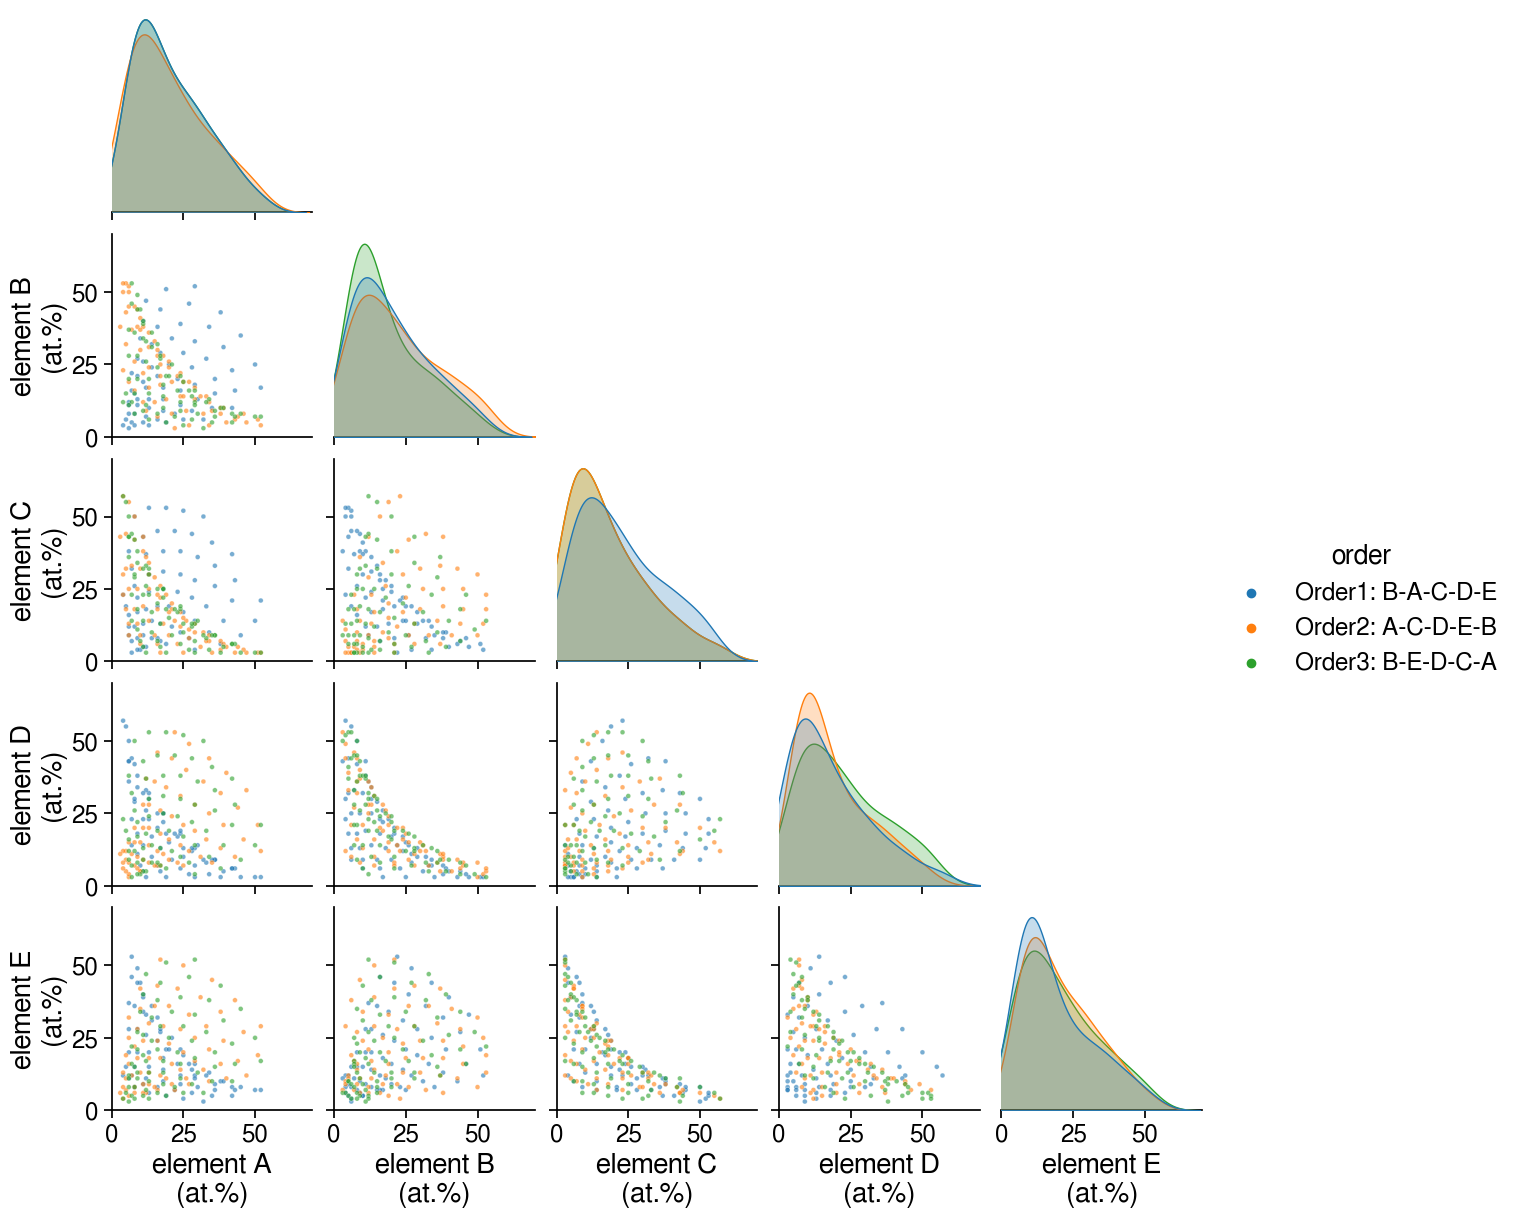

In [ ]:
# Load CSV and extract element columns
df = pd.read_csv(
    'SputteringCompoMapNormalised.dat',
    delimiter='\t',
    names=['x', 'y', 'A', 'B', 'C', 'D', 'E']
)
df1 = df[['A', 'B', 'C', 'D', 'E']] * 100

# Define the 3 orders of interest
orders = {
    "Order1: B-A-C-D-E": ['B', 'A', 'C', 'D', 'E'],
    "Order2: A-C-D-E-B": ['A', 'C', 'D', 'E', 'B'],  # rotation of order1
    "Order3: B-E-D-C-A": ['B', 'E', 'D', 'C', 'A']   # mirror of order1
}

# Rebuild DataFrames in each order
df_orders = []
for label, order in orders.items():
    df_temp = df1[order].copy()          # reorder columns
    df_temp.columns = ['A', 'B', 'C', 'D', 'E']  # reset to A–E
    df_temp['order'] = label             # tag with order
    df_orders.append(df_temp)

# Combine into one dataset
df_conc = pd.concat(df_orders, ignore_index=True)

# Tidy axis labels
df_conc.rename(columns={
    'A': 'element A\n(at.%)',
    'B': 'element B\n(at.%)',
    'C': 'element C\n(at.%)',
    'D': 'element D\n(at.%)',
    'E': 'element E\n(at.%)'
}, inplace=True)

# Pairplot
sns.set_context("notebook", font_scale=1.6)
g = sns.pairplot(
    df_conc,
    hue="order",
    kind="scatter",
    corner=True,
    plot_kws={'s': 12, 'alpha': 0.6}
)

# Adjust axes
xticks = np.arange(0, 51, 25)
yticks = np.arange(0, 51, 25)
for ax in g.axes.flat:
    if ax is not None:
        ax.set_xlim(0, 70)
        ax.set_ylim(0, 70)
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.xaxis.label.set_size(20)
        ax.yaxis.label.set_size(20)

plt.savefig("sns_PVD_pairplot_orders3.pdf")
plt.show()
